<a href="https://colab.research.google.com/github/Iam-whizzy/DataScience/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
# Computer vision: Artificial Intelligence where machines can classify an image
# Convolutional Layers: Image Processing
# ANN
# Dataset: Cifar10 ->

In [69]:
from keras import datasets, layers, models
import tensorflow as tf

In [70]:
# Load Cifar10 Dataset (Images with their labels)
# 32 x 32 pixel, colored/grey_scale
# 32 x 32 -> 784 pixels
# 16 x 16 -> 256 (0-255 maximum)
(training_images, training_labels), (testing_images, testing_labels) = tf.keras.datasets.cifar10.load_data()

In [71]:
# Image Pre Processing
training_images, testing_images = training_images/255, testing_images/255

In [72]:
# Determine the labels and store them in a list
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", " Truck"]

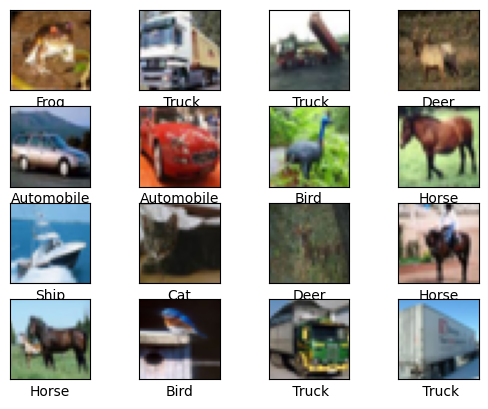

In [73]:
# Visualize Sample Images
# Subplot can draw other many plots
import matplotlib.pyplot as plt
for i in range(16):
      plt.subplot(4,4, i+ 1)
      plt.xticks([])
      plt.yticks([])
      plt.imshow(training_images[i], cmap = plt.cm.binary)
      plt.xlabel(class_names[training_labels[i][0]])
plt.show()

In [74]:
# Total Images and labels -> 60,000
# Training -> 20,000
# Testing -> 4000

training_images = training_images[:20000]
training_labels = training_labels[:20000]


testing_images= testing_images[:4000]
testing_labels = testing_labels[:4000]

In [75]:
# Convolutional Layer
model = models.Sequential()

# Input Layer -> Images
# 3, 3 matrix is kernel size - used to extract a feature
# 3 for RGB
# Feature Extraction
# Maximum Pooling
model.add(layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (16,16, 3)))
model.add(layers.MaxPool2D(2,2))

# Hidden Layers
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32, 3)))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D(2,2))

# Flattening
# 16x16 -> 256 neurons
model.add(layers.Flatten())


In [76]:
# ANN Layers -> Dense -> 32
# Decided to use 64 later

model.add(layers.Dense(64, activation = 'relu'))

# Output Layer
# Sigmoid -> One Output
# Softmax -> 10

model.add(layers.Dense(64, activation = 'softmax'))


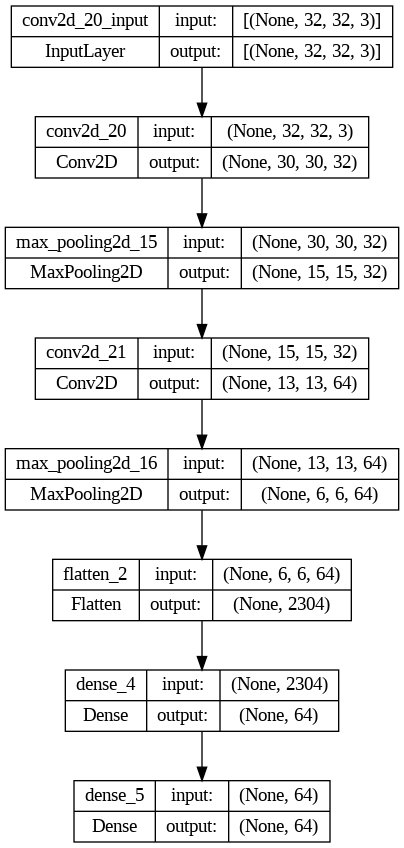

In [77]:
from keras.utils import plot_model
plot_model(model, to_file='ann_model.png', show_shapes=True)

In [78]:
# Adam - reduce loss and increase accuracy
model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [79]:
# Fit the training images and labels
# Batch size if not specified it takes the default 32
# Read about Early Stopping -> used to utilise the resources
# Overfitting

model.fit(training_images, training_labels, epochs = 10)

Epoch 1/10
625/625 [==============================] - 29s 45ms/step - loss: 1.8803 - accuracy: 0.3327
Epoch 2/10
625/625 [==============================] - 23s 37ms/step - loss: 1.5105 - accuracy: 0.4631
Epoch 3/10
625/625 [==============================] - 22s 35ms/step - loss: 1.3548 - accuracy: 0.5148
Epoch 4/10
625/625 [==============================] - 24s 39ms/step - loss: 1.2294 - accuracy: 0.5706
Epoch 5/10
625/625 [==============================] - 23s 37ms/step - loss: 1.1342 - accuracy: 0.6015
Epoch 6/10
625/625 [==============================] - 23s 37ms/step - loss: 1.0635 - accuracy: 0.6313
Epoch 7/10
625/625 [==============================] - 22s 36ms/step - loss: 0.9997 - accuracy: 0.6554
Epoch 8/10
625/625 [==============================] - 22s 35ms/step - loss: 0.9416 - accuracy: 0.6737
Epoch 9/10
625/625 [==============================] - 23s 36ms/step - loss: 0.9000 - accuracy: 0.6864
Epoch 10/10
625/625 [==============================] - 23s 36ms/step - loss: 0.858

In [80]:
# Model Evaluation
loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f"The accuracy is {accuracy} and loss is at {loss}")

125/125 [==============================] - 2s 14ms/step - loss: 1.0278 - accuracy: 0.6463
The accuracy is 0.6462500095367432 and loss is at 1.027751088142395


In [81]:
# Saving the model
model.save('image_classifier.models')

In [82]:
# Model Prediction
# Have the image in colab Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


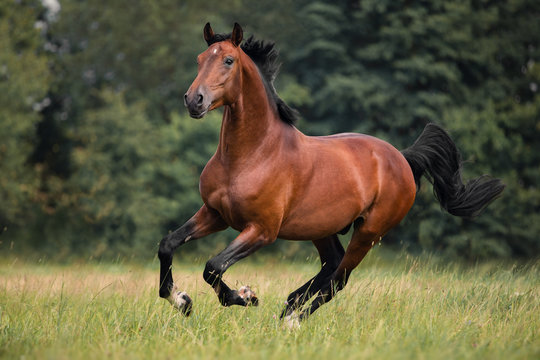

In [86]:
# Display the image

import glob
from IPython.display import Image, display
for image in glob.glob("/content/horse.jpg"):
  display(Image(filename = image))



